In [107]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat, savemat
from scipy.interpolate import interp1d

import pandas as pd

def db2mag(db): return np.power(10, db/20)

In [108]:
global_address = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Fitted_data" 
sample_folders = os.listdir(global_address)
for i in range(len(sample_folders)):
    if ".PNG" in sample_folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_folders[i]) 

[0] -----------> S11W6
[1] -----------> S18W11
[2] -----------> S5W2.7
[3] -----------> S7W4


<div style="text-align: center; font-size: 45px; color: blue;">
    S5W2.7
</div>

In [109]:
sample = 2
sample_address = global_address+"\\"+sample_folders[sample]
sample_measurements = os.listdir(sample_address)
for i in range(len(sample_measurements)):
    if ".PNG" in sample_measurements[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurements[i]) 

[0] -----------> Qannual_fits
[1] -----------> Range_1
[2] -----------> Range_3
[3] -----------> Range_4


In [110]:
%matplotlib inline

In [111]:
def average_by_t(t_array, y_array):
    """Возвращает массивы, где одинаковые t усреднены по y."""
    df = pd.DataFrame({'t': t_array, 'y': y_array})
    counts = df['t'].value_counts()

    # Повторяющиеся температуры
    repeated = df[df['t'].isin(counts[counts > 1].index)]
    grouped = repeated.groupby('t', as_index=False).mean()

    # Уникальные значения
    unique = df[df['t'].isin(counts[counts == 1].index)]

    # Объединяем
    result = pd.concat([grouped, unique], ignore_index=True)
    result = result.sort_values('t')

    return result['t'].to_numpy(), result['y'].to_numpy()

dict_keys(['__header__', '__version__', '__globals__', 'man_temp', 'man_fr'])


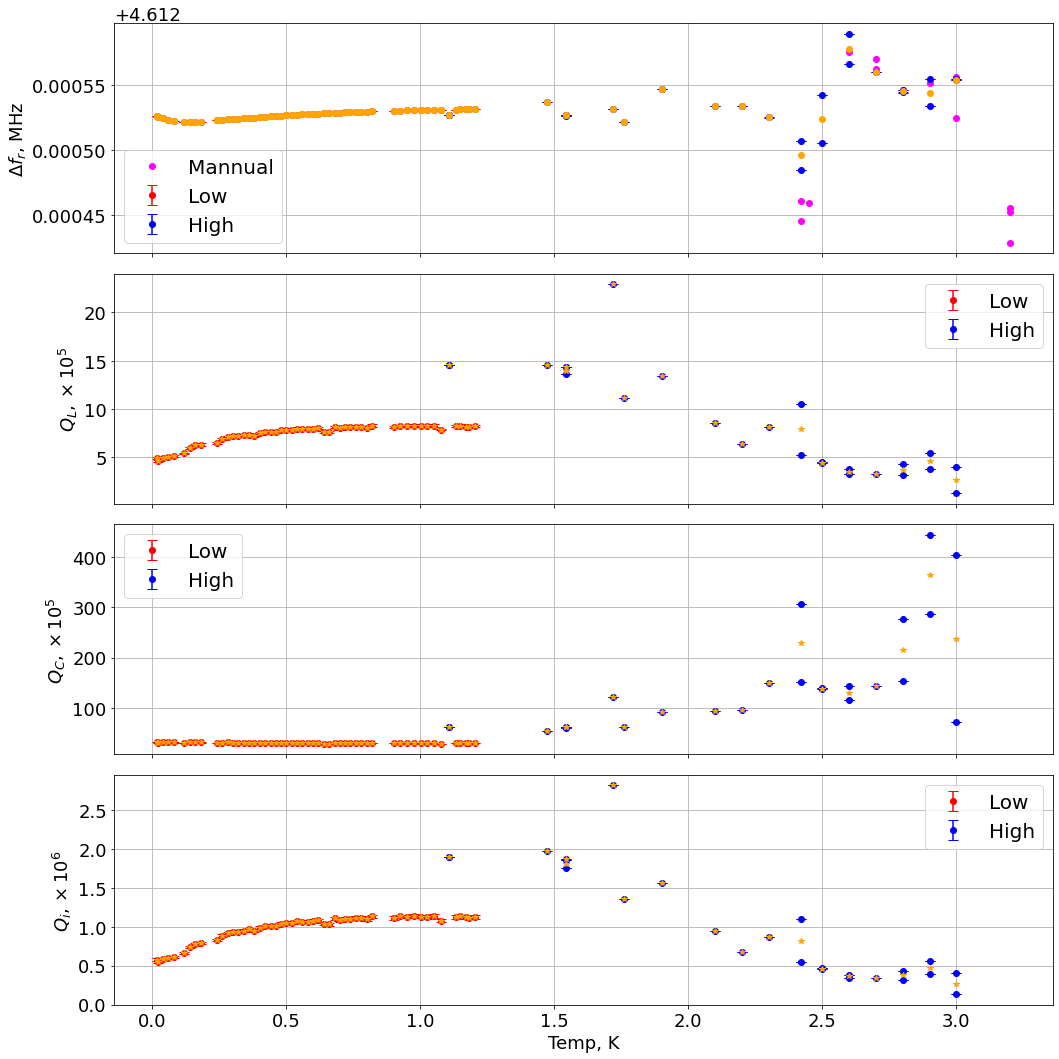

In [112]:
resonator = 0
plt.rcParams.update({
    "font.size": 16,          # General font size
    "axes.labelsize": 18,     # X and Y labels
    "axes.titlesize": 20,     # Title size
    "xtick.labelsize": 18,    # X-axis tick labels
    "ytick.labelsize": 18,    # Y-axis tick labels
    "legend.fontsize": 20,    # Legend font size
})
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), sharex = True) 

merge_all_fr = np.array([])
merge_all_ql = np.array([])
merge_all_qc = np.array([])
merge_all_qi = np.array([])

merge_all_t = np.array([])

file_address = sample_address+"\\"+sample_measurements[1]+"\\"+"Circlefit_res_" + str(resonator) + ".mat"
mat = loadmat(file_address)

resonanse_freq_low_p = mat['resonanse_freq'][0]
resonanse_ql_low_p = mat['resonanse_ql'][0] 
resonanse_qc_low_p = mat['resonanse_qc'][0]
resonanse_qi_low_p = mat['resonanse_qi'][0]
resonanse_freq_err_low_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_low_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_low_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_low_p = mat['resonanse_qi_err'][0]

good_temps_low_p = mat['good_temps'][0]

low_p_freq = np.mean(resonanse_freq_low_p[:2])

merge_all_fr = np.append(merge_all_fr, resonanse_freq_low_p)
merge_all_ql = np.append(merge_all_ql, resonanse_ql_low_p)
merge_all_qc = np.append(merge_all_qc, resonanse_qc_low_p)
merge_all_qi = np.append(merge_all_qi, resonanse_qi_low_p)

merge_all_t = np.append(merge_all_t, good_temps_low_p)

ax[0].errorbar(good_temps_low_p, (resonanse_freq_low_p-4.61)/1e9, 
               yerr=resonanse_freq_err_low_p/low_p_freq, fmt='o', label='Low', color='red', capsize=5)
ax[0].set_ylabel(r'$\Delta f_r$, MHz')
ax[1].errorbar(good_temps_low_p, resonanse_ql_low_p/1e5, 
               yerr=resonanse_ql_err_low_p/1e5, fmt='o', label='Low', color='red', capsize=5)
ax[1].set_ylabel(r'$Q_L,  \times 10^{5}$')


ax[2].errorbar(good_temps_low_p, resonanse_qc_low_p/1e5, 
               yerr=resonanse_qc_err_low_p/1e5, fmt='o', label='Low', color='red', capsize=5)
ax[2].set_ylabel(r'$Q_C, \times 10^{5}$')
ax[3].errorbar(good_temps_low_p, resonanse_qi_low_p/1e6, 
               yerr=resonanse_qi_err_low_p/1e6, fmt='o', label='Low', color='red', capsize=5)
ax[3].set_ylabel(r'$Q_i, \times 10^{6}$')
ax[3].set_xlabel(r'Temp, K')



file_address = sample_address+"\\"+sample_measurements[3]+"\\"+"Circlefit_res_" + str(resonator) + ".mat"
mat = loadmat(file_address)

resonanse_freq_high_p = mat['resonanse_freq'][0]
resonanse_ql_high_p = mat['resonanse_ql'][0] 
resonanse_qc_high_p = mat['resonanse_qc'][0]
resonanse_qi_high_p = mat['resonanse_qi'][0]
resonanse_freq_err_high_p = mat['resonanse_freq_err'][0]
resonanse_ql_err_high_p = mat['resonanse_ql_err'][0]
resonanse_qc_err_high_p = mat['resonanse_qc_err'][0]
resonanse_qi_err_high_p = mat['resonanse_qi_err'][0]

good_temps_high_p = mat['good_temps'][0]
low_p_freq = np.mean(resonanse_freq_low_p[:10])

merge_all_fr = np.append(merge_all_fr, resonanse_freq_high_p)
merge_all_ql = np.append(merge_all_ql, resonanse_ql_high_p)
merge_all_qc = np.append(merge_all_qc, resonanse_qc_high_p)
merge_all_qi = np.append(merge_all_qi, resonanse_qi_high_p)

merge_all_t = np.append(merge_all_t, good_temps_high_p)
          
ax[0].errorbar(good_temps_high_p, (resonanse_freq_high_p-4.61)/1e9, 
               yerr=resonanse_freq_err_high_p/low_p_freq, fmt='o', label='High', color='blue', capsize=5)
ax[1].errorbar(good_temps_high_p, resonanse_ql_high_p/1e5, yerr=resonanse_ql_err_high_p/1e12, fmt='o', label='High', color='blue', capsize=5)
ax[2].errorbar(good_temps_high_p, resonanse_qc_high_p/1e5, yerr=resonanse_qc_err_high_p/1e12, fmt='o', label='High', color='blue', capsize=5)
ax[3].errorbar(good_temps_high_p, resonanse_qi_high_p/1e6, yerr=resonanse_qi_err_high_p/1e12, fmt='o', label='High', color='blue', capsize=5)


man_fits_folder = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Fitted_data\S5W2.7\Qannual_fits"
file_name = man_fits_folder + "\\"+ "Manfit_res_" + str(resonator) + ".mat"
mat_man = loadmat(file_name)
print(mat_man.keys())
man_fr = mat_man['man_fr'][0]
man_temp = mat_man['man_temp'][0] 
ax[0].plot(man_temp, man_fr, 'o', label='Mannual', color='magenta')


mean_temps, mean_fr = average_by_t(merge_all_t, merge_all_fr)
mean_temps, mean_ql = average_by_t(merge_all_t, merge_all_ql/1e5)
mean_temps, mean_qc = average_by_t(merge_all_t, merge_all_qc/1e5)
mean_temps, mean_qi = average_by_t(merge_all_t, merge_all_qi/1e6)

ax[0].plot(mean_temps, (mean_fr)/1e9, 'o', color='orange', zorder=10)
ax[1].plot(mean_temps, mean_ql, '*', color='orange', zorder=10)
ax[2].plot(mean_temps, mean_qc, '*', color='orange', zorder=10)
ax[3].plot(mean_temps, mean_qi, '*', color='orange', zorder=10)


# ax[0].set_ylim(-20, 20)
plt.tight_layout()
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
plt.show()

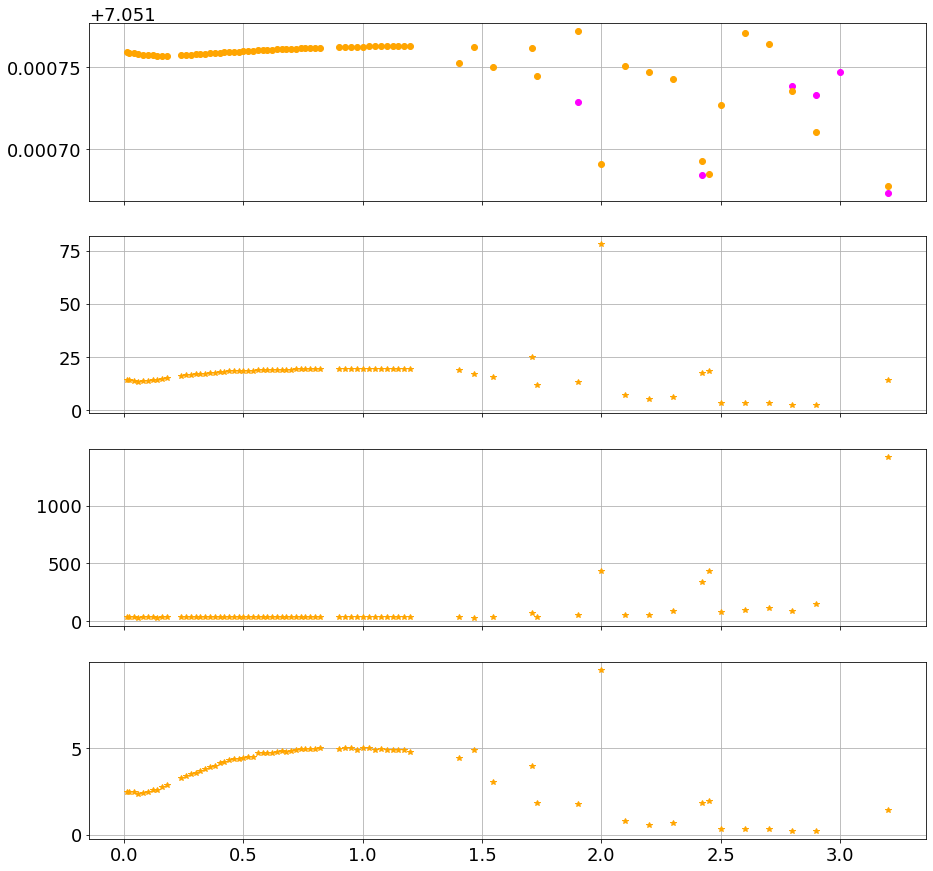

In [104]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 15), sharex = True) 

ax[0].plot(mean_temps, (mean_fr)/1e9, 'o', color='orange', zorder=10)
ax[1].plot(mean_temps, mean_ql, '*', color='orange', zorder=10)
ax[2].plot(mean_temps, mean_qc, '*', color='orange', zorder=10)
ax[3].plot(mean_temps, mean_qi, '*', color='orange', zorder=10)
ax[0].plot(man_temp, man_fr, 'o', label='Mannual', color='magenta')

ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

In [105]:
final_merged_data_folder = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Temperature_sweep\Final_merged_data\S5W2.7"
file_name = "final_fit_all_T_res_" + str(resonator) + ".mat"
sample_address = final_merged_data_folder+"\\"+file_name

fitting_state = dict()
fitting_state['mean_temps'] = mean_temps
fitting_state['mean_freqs'] = mean_fr
fitting_state['mean_ql'] = mean_ql
fitting_state['mean_qc'] = mean_qc
fitting_state['mean_qi'] = mean_qi
fitting_state['mannual_fit_temp'] = man_temp
fitting_state['mannual_fit_fr'] = man_fr


savemat(sample_address, fitting_state)